## Cell 1:

# Cell 1

### 15 October 2021
### K. M. Jones (kmj.jones@gmail.com)
This quick notebook takes in fully processed, registered, trimmed, and re-convolved astronomical images
and runs them through Source Extractor's dual image mode
using settings that were selected to best handle the data from GoGreen clusters of galaxies (described, and set, in default_dualimage.sex)
and produces an output Fits file holding a combined table of data from both the red and blue images
identified using the positions determined from the redder of the two images

It then adds two columns containing information from the weight images associated with
both the red and the blue (reprojected) image (the reprojected blue weight image)
hmmm shoot do I need to convolve that blue weight image too?? 

**GHR: 5.Apr.2022** I don't think that we need to convolve the blue weight image.  Officially it's the right thing to do but in practice makes almost no difference

next, it adds two columns of information that give the noise dispersion for the 
flux_aper measurements made in red and blue

## Cell 2:

In [2]:
#Cell 2
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import getweight
from astropy import wcs
import depthcalc
import scipy as sp
import math as m
from io import StringIO

## Cell 3:

In [3]:
#Cell 3
#update this to have user input filered, fileblue, and output catalog names
#change these
filered="/home/wes/Astronomy/Data/GoGreen/j020548m5829/PreData/j020548m5829-f140w_drz_sci.fits"
fileblue="/home/wes/Astronomy/Data/GoGreen/j020548m5829/ProData/j0205_f606w_reprj_conv_sept21b_7.fits"

#this contains a lot of info about each cluster.  
metatab="/home/wes/Astronomy/Code/catalog_creation/metatable_v1.txt"

red_hdu=fits.open(filered)
blue_hdu=fits.open(fileblue)
rhdr=red_hdu[0].header
bhdr=blue_hdu[0].header

#these are values needed to convert the flux in the image into magnitudes.  
#The necessary conversion comes from the HST data manual (or handbook, can't remember the name)
photvals=[rhdr['PHOTFLAM'],rhdr['PHOTPLAM']]
photvalsb=[bhdr['PHOTFLAM'],bhdr['PHOTPLAM']]

#things KMJ wrote as stuff she'd like to do
#will need an output objectsubtracted or seg image to calculate the rms?
#hmm, maybe to use the pre-dual-mode images to calc rms bc more accurate (more area, def) for ie blue

#output catalog names
fileoutrr='j0205_dualrr_cbs_min5.cat'
fileoutrb='j0205_dualrb_cbs_min5.cat'

#WS: change these for each cluster
#WES: moved these higher for use in os.system
redwht="/home/wes/Astronomy/Data/GoGreen/j020548m5829/PreData/j020548m5829-f140w_drz_wht.fits"
bluewht="/home/wes/Astronomy/Data/GoGreen/j020548m5829/ProData/j0205_f606w_reprj_wht.fits"

#GHR will need to put in explicit path names for all input and output files
#this runs SExtractor with a set of input parameters that override those in the .sex file
#WES noticed a WEIGHT_IMAGE setting in the default_dualimage.sex
wb=os.system("sex" + " " + filered + "," + filered + " -c default_dualimage.sex -CATALOG_NAME" + " " + fileoutrr + " -WEIGHT_IMAGE " + redwht)
wr=os.system("sex" + " " + filered + "," + fileblue + " -c default_dualimage.sex -CATALOG_NAME" + " " + fileoutrb + " -WEIGHT_IMAGE " + bluewht)

#not sure what these do, probably want to change them to take the information from the file name
#going to leave them as is at least until I fix the reprojection headers
#slight lie ^ going to change every '105' i see to '140'
colnames=['SE_ID_f140w','X_IMAGE_f140w','Y_IMAGE_f140w','ALPHA_J2000_f140w','DELTA_J2000_f140w','SEFLAGS_f140w','CLASS_STAR_f140w','FLUX_AUTO_f140w','FLUXERR_AUTO_f140w','FLUX_ISO_f140w','FLUXERR_ISO_f140w','FLUX_APER_f140w','FLUXERR_APER_f140w','FWHM_IMAGE_f140w','KRON_RADIUS_f140w','ISOAREA_IMAGE_f140w','A_IMAGE_f140w','B_IMAGE_f140w','THETA_IMAGE_f140w']
colnames2=['X_IMAGE_f606w','Y_IMAGE_f606w','ALPHA_J2000_f606w','DELTA_J2000_f606w','SEFLAGS_f606w','CLASS_STAR_f606w','FLUX_AUTO_f606w','FLUXERR_AUTO_f606w','FLUX_ISO_f606w','FLUXERR_ISO_f606w','FLUX_APER_f606w','FLUXERR_APER_f606w','FWHM_IMAGE_f606w','KRON_RADIUS_f606w','ISOAREA_IMAGE_f606w','A_IMAGE_f606w','B_IMAGE_f606w','THETA_IMAGE_f606w']

outputcatalog='catalog_dualmode_j020548m5829.fits'

#changed these to 140 aswell
#GHR it seems like these are not used anywhere so we can try to comment them out.
#rednames=['FLUX_AUTO_f140w','FLUX_ISO_f140w','FLUX_APER_f140w']
#bluenames=['FLUX_AUTO_f606w','FLUX_ISO_f606w','FLUX_APER_f606w']

#going to try moving all .conv files into a subfolder named config


> 
----- SExtractor 2.25.0 started on 2022-04-11 at 19:30:47 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing catalog
> Looking for j020548m5829-f140w_drz_sci.fits
----- Detecting from: j020548m5829-f140w_drz_sci.fits [0/2]
      "Unnamed" / no ext. header / 6381x6728 / 32 bits (floats)
> Looking for j020548m5829-f140w_drz_sci.fits
----- Measuring from: j020548m5829-f140w_drz_sci.fits [0/2]
      "Unnamed" / no ext. header / 6381x6728 / 32 bits (floats)
Measurement image:> Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up back

> Setting up background map at line: 2880
> Setting up background map at line: 2944
> Setting up background map at line: 3008
> Setting up background map at line: 3072
> Setting up background map at line: 3136
> Setting up background map at line: 3200
> Setting up background map at line: 3264
> Setting up background map at line: 3328
> Setting up background map at line: 3392
> Setting up background map at line: 3456
> Setting up background map at line: 3520
> Setting up background map at line: 3584
> Setting up background map at line: 3648
> Setting up background map at line: 3712
> Setting up background map at line: 3776
> Setting up background map at line: 3840
> Setting up background map at line: 3904
> Setting up background map at line: 3968
> Setting up background map at line: 4032
> Setting up background map at line: 4096
> Setting up background map at line: 4160
> Setting up background map at line: 4224
> Setting up background map at line: 4288
> Setting up background map at lin

> Line: 1800  Objects:        0 detected /        0 sextracted
> Line: 1825  Objects:        0 detected /        0 sextracted
> Line: 1850  Objects:        0 detected /        0 sextracted
> Line: 1875  Objects:        0 detected /        0 sextracted
> Line: 1900  Objects:        0 detected /        0 sextracted
> Line: 1925  Objects:        0 detected /        0 sextracted
> Line: 1950  Objects:        0 detected /        0 sextracted
> Line: 1975  Objects:        0 detected /        0 sextracted
> Line: 2000  Objects:        0 detected /        0 sextracted
> Line: 2025  Objects:        0 detected /        0 sextracted
> Line: 2050  Objects:        0 detected /        0 sextracted
> Line: 2075  Objects:        0 detected /        0 sextracted
> Line: 2100  Objects:        0 detected /        0 sextracted
> Line: 2125  Objects:        1 detected /        0 sextracted
> Line: 2150  Objects:       24 detected /        0 sextracted
> Line: 2175  Objects:       53 detected /        0 sex

> Line: 5150  Objects:     4083 detected /     3147 sextracted
> Line: 5172  Objects:     4083 detected /     3200 sextracted
> Line: 5175  Objects:     4083 detected /     3207 sextracted
> Line: 5200  Objects:     4083 detected /     3235 sextracted
> Line: 5225  Objects:     4083 detected /     3273 sextracted
> Line: 5250  Objects:     4083 detected /     3304 sextracted
> Line: 5275  Objects:     4083 detected /     3313 sextracted
> Line: 5300  Objects:     4083 detected /     3315 sextracted
> Line: 5325  Objects:     4083 detected /     3315 sextracted
> Line: 5350  Objects:     4083 detected /     3315 sextracted
> Line: 5375  Objects:     4083 detected /     3315 sextracted
> Line: 5400  Objects:     4083 detected /     3315 sextracted
> Line: 5425  Objects:     4083 detected /     3315 sextracted
> Line: 5450  Objects:     4083 detected /     3315 sextracted
> Line: 5475  Objects:     4083 detected /     3315 sextracted
> Line: 5500  Objects:     4083 detected /     3315 sex

> Setting up background map at line: 4224
> Setting up background map at line: 4288
> Setting up background map at line: 4352
> Setting up background map at line: 4416
> Setting up background map at line: 4480
> Setting up background map at line: 4544
> Setting up background map at line: 4608
> Setting up background map at line: 4672
> Setting up background map at line: 4736
> Setting up background map at line: 4800
> Setting up background map at line: 4864
> Setting up background map at line: 4928
> Setting up background map at line: 4992
> Setting up background map at line: 5056
> Setting up background map at line: 5120
> Setting up background map at line: 5184
> Setting up background map at line: 5248
> Setting up background map at line: 5312
> Setting up background map at line: 5376
> Setting up background map at line: 5440
> Setting up background map at line: 5504
> Setting up background map at line: 5568
> Setting up background map at line: 5632
> Setting up background map at lin

> Line: 1750  Objects:        0 detected /        0 sextracted
> Line: 1775  Objects:        0 detected /        0 sextracted
> Line: 1800  Objects:        0 detected /        0 sextracted
> Line: 1825  Objects:        0 detected /        0 sextracted
> Line: 1850  Objects:        0 detected /        0 sextracted
> Line: 1875  Objects:        0 detected /        0 sextracted
> Line: 1900  Objects:        0 detected /        0 sextracted
> Line: 1925  Objects:        0 detected /        0 sextracted
> Line: 1950  Objects:        0 detected /        0 sextracted
> Line: 1975  Objects:        0 detected /        0 sextracted
> Line: 2000  Objects:        0 detected /        0 sextracted
> Line: 2025  Objects:        0 detected /        0 sextracted
> Line: 2050  Objects:        0 detected /        0 sextracted
> Line: 2075  Objects:        0 detected /        0 sextracted
> Line: 2100  Objects:        0 detected /        0 sextracted
> Line: 2125  Objects:        1 detected /        0 sex

> Line: 5475  Objects:     4083 detected /     3315 sextracted
> Line: 5500  Objects:     4083 detected /     3315 sextracted
> Line: 5525  Objects:     4083 detected /     3315 sextracted
> Line: 5550  Objects:     4083 detected /     3315 sextracted
> Line: 5575  Objects:     4083 detected /     3315 sextracted
> Line: 5600  Objects:     4083 detected /     3315 sextracted
> Line: 5625  Objects:     4083 detected /     3315 sextracted
> Line: 5650  Objects:     4083 detected /     3315 sextracted
> Line: 5675  Objects:     4083 detected /     3315 sextracted
> Line: 5700  Objects:     4083 detected /     3315 sextracted
> Line: 5725  Objects:     4083 detected /     3315 sextracted
> Line: 5750  Objects:     4083 detected /     3315 sextracted
> Line: 5775  Objects:     4083 detected /     3315 sextracted
> Line: 5800  Objects:     4083 detected /     3315 sextracted
> Line: 5825  Objects:     4083 detected /     3315 sextracted
> Line: 5850  Objects:     4083 detected /     3315 sex

##  Cell 4:

In [11]:
#Cell 4
#GHR: Read in output catalogs from SExtractor.  Each of these contains the fluxe measured on one of the
#images as detected on the red image
f=open(fileoutrr,'r')
g=open(fileoutrb,'r')
#typehold='f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8'

#GHR: reads in SExtractor output catlaogs but has a hardcoded number of output columns
datarr=np.genfromtxt(f,skip_header=19,comments='#',usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18))

#GHR: skips first output column in blue file because it contains a duplicate ID.
datarb=np.genfromtxt(g,skip_header=19,comments='#',usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18))

#row-based arrangement
#GHR: combaines two files on a row-by-row basis to form a combined file
#data
data_total=np.concatenate((datarr,datarb),axis=1)
#column names
nms=np.concatenate((colnames, colnames2),axis=0)
#GHR if you changed the above to use the SExtractor automatic read format from https://het.as.utexas.edu/HET/Software/Astropy-0.4.2/io/unified.html 
# then the column names would be automatically generated and not have to be manually entered


#print(nms)

#print(np.shape(datarr),np.shape(datarb),np.shape(data_total))
#print(datarr[0,13],datarr[0,14])
#print(datarb[0,12],datarb[0,13])
#print(data_total[6,13],data_total[6,14])
#print(data_total[6,30],data_total[6,31])

FileNotFoundError: [Errno 2] No such file or directory: 'j0205_dualrr_cbs_min5.cat'

## Cell 5:

In [5]:
#Cell 5
##### convert units for catalog output
#make units: uJy (for catalog; convert to magnitude when USE catalog to make plot
# OR Give f/f(m=25) as the catalog quantity,
#such that you can compute AB magnitude using m = -2.5 * log(f/f(m=25)) + 25
#note that FLUXAPER and FLUXAUTO and etc that result from 
#source extractor should be in *counts*, so need to be converted to Jy first.

#print('red auto iso aper:',np.where(nms=='FLUX_AUTO_f105w'),np.where(nms=='FLUX_ISO_f105w'),np.where(nms=='FLUX_APER_f105w'))
#print('blue auto iso aper:',np.where(nms=='FLUX_AUTO_f606w'),np.where(nms=='FLUX_ISO_f606w'),np.where(nms=='FLUX_APER_f606w'))


#GHR: these are values specific to each image and come from the image header earlier  in the code
photflam_red=photvals[0]
photflam_blue=photvalsb[0]
photplam_red=photvals[1]
photplam_blue=photvalsb[1]

#GHR these are equations from the HST data handbook
c_ang=sp.constants.c * (10.0**10.0)
conversion=((photplam_red*photplam_red)/c_ang)*(1.0/(10.0**(-23.0)))*(10.0**6.0)
convb=((photplam_blue*photplam_blue)/c_ang)*(1.0/(10.0**(-23.0)))*(10.0**6.0)

#GHR: takes the column in the data_total array corresponding to the column name in 'nms' and assigns it 
#to a named variable.  It would be a better practice to assign these to new Table columns instead of making
#new variables for every column
#GHR: The 105 and 140 need to be made consistent throughout.  
countsauto_f105w=data_total[:,int(np.where(nms=='FLUX_AUTO_f140w')[0])] #from lines 8 and 9 in this cell
#cerr_auto_f105w=data_total[:,int(np.where(nms=='FLUXERR_AUTO_f105w')[0])]
countsiso_f105w=data_total[:,int(np.where(nms=='FLUX_ISO_f140w')[0])]
#cerr_iso_f105w=data_total[:,int(np.where(nms=='FLUXERR_ISO_f105w')[0])]
countsaper_f105w=data_total[:,int(np.where(nms=='FLUX_APER_f140w')[0])]
#cerr_aper_f105w=data_total[:,int(np.where(nms=='FLUXERR_APER_f105w')[0])]
countsauto_f606w=data_total[:,int(np.where(nms=='FLUX_AUTO_f606w')[0])]
#cerr_auto_f606w=data_total[:,int(np.where(nms=='FLUXERR_AUTO_f606w')[0])]
countsiso_f606w=data_total[:,int(np.where(nms=='FLUX_ISO_f606w')[0])]
#cerr_iso_f606w=data_total[:,int(np.where(nms=='FLUXERR_ISO_f606w')[0])]
countsaper_f606w=data_total[:,int(np.where(nms=='FLUX_APER_f606w')[0])]
#cerr_aper_f606w=data_total[:,int(np.where(nms=='FLUXERR_APER_f606w')[0])]

#GHR: applies coversion values from HST handbook to generate fluxes in microJy for each flux
#This is done for the AUTO, ISO, and Circular aperture
#recall f_nu= pivot lambda^2/c * flambda?  #GHR not sure why there is a '?'
#GHR F105W
flambda_auto_f105w=countsauto_f105w*photflam_red
fnu_auto_f105w = flambda_auto_f105w*conversion #now in microJansky
flambda_iso_f105w=countsiso_f105w*photflam_red
fnu_iso_f105w = flambda_iso_f105w*conversion #now in microJansky
flambda_aper_f105w=countsaper_f105w*photflam_red
fnu_aper_f105w = flambda_aper_f105w*conversion #now in microJansky

#GHR: F606W
flam_auto_606=countsauto_f606w*photflam_blue
fnu_auto_f606w=flam_auto_606*convb #now in microJansky
flam_iso_f606w=countsiso_f606w*photflam_blue
fnu_iso_f606w=flam_iso_f606w*convb
flam_aper_f606w=countsaper_f606w*photflam_blue
fnu_aper_f606w=flam_aper_f606w*convb



red auto iso aper: (array([7]),) (array([9]),) (array([11]),)
blue auto iso aper: (array([25]),) (array([27]),) (array([29]),)


## Cell 6:

In [16]:
#Cell 6

##Pull the weight value from the corresponding(ish) pixel for each band's wht.fits


#oh, crap, x_image and y_image aren't integers -.-
#round them to the nearest integer and then subtract 1 from each to feed 
#into the array that wi gives (a regular ol array starts at 0,0)

#above is the weight image, reprojected (blue2red_exactfinal)
#uhhhhhhh should I convolve it too? IDK why, that should only concern the spread of flux, not weight


wi_f105w=[]
wi_f606w=[]

#GHR: for every single catalog entry (or object) find the pixels of the center of that object
#go to the corresponding pixel in the weight image, and save that value.
for i in range(len(data_total[:,1])):
    #GHR get x and y pixel for every source.  Round them to integer values.  There is an 
    #indexing problem here because x,y in SExtractor start from 1 and arrays start from 0.  
    #This is actually taken care of in getweight.wi
    #1 and 2 index refer to 1st and 2nd column
    #of catalog, which are the x and y coordinate.  This will break if the column output order
    #is changed.
    wix=round(data_total[i,1])
    wiy=round(data_total[i,2])

    #get weight image in the two images for every source and append it to the total list
    wir=getweight.wi(redwht,wix,wiy)
    wi_f105w.append(wir)
    wib=getweight.wi(bluewht,wix,wiy)
    wi_f606w.append(wib)

#GHR get the maximum value of the weight image over all pixels for each image
#based on the getweight.getmax code, the first value returned is actually the top 1%, not 10%
wr10pct,wrmax=getweight.getmax(redwht)
wb10pct,wbmax=getweight.getmax(bluewht)
print(wr10pct,wb10pct)
#output these to meta-table? or just use em myself

#add wi columns
#GHR turn list into array and then normalize array by 1% highest value
#F105W
wif105w=np.array(wi_f105w)
wir_wimx=wif105w/wr10pct   #normalizes by 1% highest value, not 10% highest value as name indicates
#GHR I'm not sure why this is being reshaped (never was good at reshaping) but the number of rows 
#is hardcoded.  This needs to be determined by the number of sources in your catalog, basically 
#len(data_total[:,1])
wi_red=wir_wimx.reshape((1740,1))

#F606W
wif606w=np.array(wi_f606w)
wib_wimx=wif606w/wb10pct
wi_blue=wib_wimx.reshape((1740,1))


#####a little check demonstrating why we want wb10pct instead of wbmax
####don't need to run this
#wr10pct,wrmax=getweight.getmax(redwht)
#wb10pct,wbmax=getweight.getmax(bluewht)
#print('10percent from the top red, highestred, then same for blue,blue',wr10pct,wrmax)
#print(wb10pct,wbmax)
#plt.plot(wif606w,'g.') shows why we want wb10pct instead of wbmax



10694.942 29770.775825471697


## Cell 6.5:

In [37]:
#cell 6.5
###this is an in-progress cell trying to extract the necessary 
#rms and C1, C2 values below from the metatable rather than entering them manually
#replacing the #********* bracketed section in Cell 7 below.


t=open(metatab,'r')
#contents=t.read()
tmp={"names":['col1','col2'],"formats":['string','f8']}
tmp2=[('A',str),('C',float)]
mettmp=np.genfromtxt(t,comments='#',dtype=tmp2,usecols=(0,2))
print(mettmp)
#holdformat={"names":['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W'],"formats":['str','str',f6,f6,f4,'f6','f6','f6','f6','f6','f3','f3','f3','f3','f3','str','f8','f8','f8','str','f8','f8','f8']}
#print(holdformat["formats"])
#meta_table=np.genfromtxt(t,dtype=holdformat,comments='#',usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
#print(meta_table)

[('', 216.625) ('',     nan) ('',     nan) ('',     nan) ('',     nan)]


## Cell 7:

In [12]:
#Cell 7
### make/calculate/construct new errrors for flux auto1 and flux auto2
#disp_i(N) = N*o_bar(a_i + (b_i * N))/np.sqrt(wi)
#need: N, linear size = sqrt(area) ~radius. aperture is 5.0 pixels diameter so 2.5 pix radius
#o_bar (rms for the image/band),
#ai and bi (coefficients of the parameterized function for the image/band)
#weight value (wi, not wi/wimax)
denomr=np.sqrt(wif105w)
denomb=np.sqrt(wif606w)



kr_red = data_total[:,int(np.where(nms=='KRON_RADIUS_f105w')[0])]#this isn't radius yet
a_red=data_total[:,int(np.where(nms=='A_IMAGE_f105w')[0])]
b_red=data_total[:,int(np.where(nms=='B_IMAGE_f105w')[0])]
N_AUTOred=np.sqrt(m.pi*(a_red*kr_red)*(b_red*kr_red))
kr_blue = data_total[:,int(np.where(nms=='KRON_RADIUS_f606w')[0])]
a_blue=data_total[:,int(np.where(nms=='A_IMAGE_f606w')[0])]
b_blue=data_total[:,int(np.where(nms=='B_IMAGE_f606w')[0])]
N_AUTOblue= np.sqrt(m.pi*(a_blue*kr_blue)*(b_blue*kr_blue))

Naper = 2.5  #aperture is 5.0 pixels diameter so 2.5 pix radius . NOTE THIS IS N_APER; same for red and blue
N_ISO1red = data_total[:,int(np.where(nms=='ISOAREA_IMAGE_f105w')[0])] #this should = sqrt of ISO_AREA
N_ISO_f105w=np.sqrt(N_ISO1red)
N_ISO1blue = data_total[:,int(np.where(nms=='ISOAREA_IMAGE_f606w')[0])]
N_ISO_f606w=np.sqrt(N_ISO1blue)

#well, I should read this out of the meta-table that I haven't created yet
#*******************
#specific to individual bands and clusters (each image)
#C1 and C2 come from fitting in Working_Depth.ipynb
fileredmask='/home/k689j329/HSTdata/j210604m5845/j210604m5845-f105w_drz_sci_mask.fits'
fileredseg='/home/k689j329/HSTdata/j210604m5845/j210604m5845_f105w_seg_newnorm3.fits'
obar_counts_f105w,useless=depthcalc.rmscalc(filered,fileredmask,fileredseg,[5,10]) #(note that these are just some random values in the array bc it requires it to be input to make the second output; but we don't care about the second output so basically ignore. later on I should set it up to be default turned off or something)
obar_f105w=obar_counts_f105w*photflam_red*conversion
C1_f105w=0.01652168137
a_f105w=C1_f105w/obar_f105w
C2_f105w=0.002475885999
b_f105w=C2_f105w/obar_f105w

filebluemask='/home/k689j329/HSTdata/j2106_blue2red_exact_conv_apr21_5_mask.fits'
fileblueseg='/home/k689j329/sextractor-2.19.5/j2106_b2rec_apr21_5_seg.fits'
obar_counts_f606w,useless=depthcalc.rmscalc(fileblue,filebluemask,fileblueseg,[5,10])
obar_f606w=obar_counts_f606w*photflam_blue*convb
C1_f606w=0.01246307609
a_f606w=C1_f606w/obar_f606w
C2_f606w=0.0002696116525 ###these coefficients are unitless btw
b_f606w=C2_f606w/obar_f606w
#**********************

#fluxerrs in counts
fluxerr_aper_f105w=(C1_f105w*Naper + C2_f105w*Naper*Naper)/denomr
fluxerr_auto_f105w=(C1_f105w*N_AUTOred + C2_f105w*N_AUTOred*N_AUTOred)/denomr
fluxerr_iso_f105w=(C1_f105w*N_ISO_f105w + C2_f105w*N_ISO_f105w*N_ISO_f105w)/denomr
fluxerr_aper_f606w=(C1_f606w*Naper + C2_f606w*Naper*Naper)/denomb
fluxerr_auto_f606w=(C1_f606w*N_AUTOblue + C2_f606w*N_AUTOblue*N_AUTOblue)/denomb
fluxerr_iso_f606w=(C1_f606w*N_ISO_f105w + C2_f606w*N_ISO_f606w*N_ISO_f606w)/denomb

#convert to fluxes; ratios of s/n (or n/s, whatev) in counts and in flux should be the same, so scale:
delff_105w = fluxerr_aper_f105w/countsaper_f105w
fluxerr_aper_jy_f105w = delff_105w*fnu_aper_f105w
delff_auto_red = fluxerr_auto_f105w/countsauto_f105w
fluxerr_auto_jy_f105w = delff_auto_red*fnu_auto_f105w
delff_iso_red = fluxerr_iso_f105w/countsiso_f105w
fluxerr_iso_jy_f105w = delff_iso_red*fnu_iso_f105w

delff_606w=fluxerr_aper_f606w/countsaper_f606w
fluxerr_aper_jy_f606w=delff_606w*fnu_aper_f606w
delff_auto_blue=fluxerr_auto_f606w/countsauto_f606w
fluxerr_auto_jy_f606w=delff_auto_blue*fnu_auto_f606w
delff_iso_blue=fluxerr_iso_f606w/countsiso_f606w
fluxerr_iso_jy_f606w=delff_iso_blue*fnu_iso_f606w

#print(np.shape(fluxerr_auto_jy_f606w[np.isnan(fluxerr_auto_jy_f606w)]))
#hmm, a few NaNs preserved

#####just checking on the flux conversion for the errors and the fluxes
####don't need this chunk to do anything.
#fea105w_jy=fluxerr_aper_f105w*photflam_red*conversion
#fea606w_jy=fluxerr_aper_f606w*photflam_blue
#delf_f_ratio=fluxerr_aper_f105w/countsaper_f105w
#delf_f_rat_jy=fea105w_jy/fnu_aper_f105w
#ratio2=delf_f_rat_jy/delf_f_ratio
#print(np.shape(ratio2))
#print(np.shape(ratio2[np.where(ratio2>0.99999985)]))
#print(np.shape(ratio2[np.isnan(ratio2)]))
#ah, yep, the two ratios, in counts and janskies, are virtually identical (at far less than ~ few % level)
#so either method works.


STDEV of all "valid" pixels in scidata: 0.020604307
rms actual: 0.020604441
STDEV of all "valid" pixels in scidata: 0.0024854857416880703
rms actual: 0.002497132541572541


/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/k689j329/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWa

## Cell 8:

In [13]:
#Cell 8

#turn output data into a fits table

data_total1=data_total.copy()
data_total1[:,int(np.where(nms=='FLUX_AUTO_f105w')[0])] = fnu_auto_f105w[:]
data_total1[:,int(np.where(nms=='FLUXERR_AUTO_f105w')[0])] = fluxerr_auto_jy_f105w[:]
data_total1[:,int(np.where(nms=='FLUX_ISO_f105w')[0])] = fnu_iso_f105w[:]
data_total1[:,int(np.where(nms=='FLUXERR_ISO_f105w')[0])] = fluxerr_iso_jy_f105w[:]
data_total1[:,int(np.where(nms=='FLUX_APER_f105w')[0])] = fnu_aper_f105w[:]
data_total1[:,int(np.where(nms=='FLUXERR_APER_f105w')[0])] = fluxerr_aper_jy_f105w[:]
data_total1[:,int(np.where(nms=='FLUX_AUTO_f606w')[0])] = fnu_auto_f606w[:]
data_total1[:,int(np.where(nms=='FLUXERR_AUTO_f606w')[0])] = fluxerr_auto_jy_f606w[:]
data_total1[:,int(np.where(nms=='FLUX_ISO_f606w')[0])] = fnu_iso_f606w[:]
data_total1[:,int(np.where(nms=='FLUXERR_ISO_f606w')[0])] = fluxerr_iso_jy_f606w[:]
data_total1[:,int(np.where(nms=='FLUX_APER_f606w')[0])] = fnu_aper_f606w[:]
data_total1[:,int(np.where(nms=='FLUXERR_APER_f606w')[0])] = fluxerr_aper_jy_f606w[:]


#data_total2=np.concatenate((data_total1,FLUXERR_APER_F105w,FLUXERR_APER_F606w),axis=1)
data_total2=np.concatenate((data_total1,wi_red,wi_blue),axis=1)
print(np.shape(data_total1),np.shape(data_total2))

coltot=np.concatenate((colnames,colnames2,['F105w_normweight'],['F606w_normweight']),axis=0)
k=0
n=[]
for item in coltot:
    a=fits.Column(name=item,array=data_total2[:,k],format='f8')
    n.append(a)
    k+=1

t=fits.BinTableHDU.from_columns(n)
#t.writeto(outputcatalog)



(1740, 37) (1740, 39)


-hmm, not sure why there are a few points in the weight image with bizarre weight values (extra high), but clearly this is gonna lead to wi/wmax that are greater than 1
-so, probably need to flag anything with the column >1, for both wib_wimx and wir_wimx


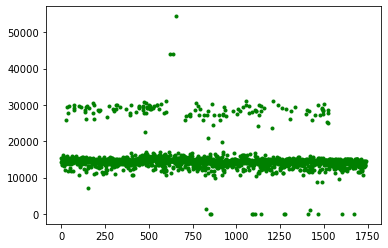

In [27]:
#a bonus cell demonstrating why we want the upper limit of the weight value to be not the highest value but the 10% highest value
plt.plot(wif606w,'g.')
print('-hmm, not sure why there are a few points in the weight image with bizarre weight values (extra high), but clearly this is gonna lead to wi/wmax that are greater than 1')
print('-so, probably need to flag anything with the column >1, for both wib_wimx and wir_wimx')